In [1]:
import torch
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from vae import IMAGE_SIZE, celeb_transform, CELEB_PATH


CELEB_PATH ./ IMAGE_SIZE 150 LATENT_DIM 128 image_dim 67500


In [4]:
MODEL_FILE = "vae_model_20.pth"  # 训练好的模型

In [15]:
model.eval()  # 设置为评估模式

VAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Sequentia

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = CelebA(CELEB_PATH, transform=celeb_transform, download=False, split="all")
loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
model = torch.load(MODEL_FILE, map_location=device, weights_only=False)

for pic, _ in loader:  # batch size is 1, loader is shuffled, so this gets one random pic
    pics = pic.to(device)
    break
orig = torch.clone(pics)

# 原图、7次重建图
for _ in range(7):
    recon, _, _ = model(pics)
    pic = recon[0].view(1, 3, IMAGE_SIZE, IMAGE_SIZE)
    pics = torch.cat((pics, pic), dim=0)

save_image(pics.to("cpu"), "rndpics.jpg", nrow=8)

# 调节潜在向量
mu, log_var = model.encode(orig)

for _ in range(8):
    w = 1e-11
    std = torch.exp(w * log_var)  # 调节方差
    eps = torch.randn_like(std)  # 从标准正态分布中随机采样
    z = eps * std + mu  # 重参数化，得到新的潜在向量
    recon = model.decode(z)  # 重构图片
    pic = recon[0].view(1, 3, IMAGE_SIZE, IMAGE_SIZE)
    pics = torch.cat((pics, pic), dim=0)

save_image(pics.to("cpu"), "rndpics1.jpg", nrow=8)


In [8]:
import matplotlib.pyplot as plt

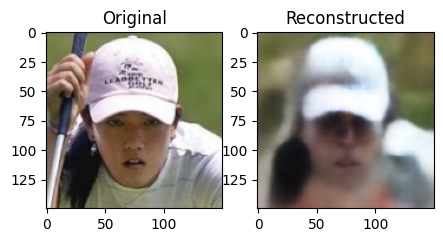

In [16]:
# 加载一张随机图片
dataset = CelebA(CELEB_PATH, transform=celeb_transform, download=False, split="all")
loader = DataLoader(dataset, batch_size=1, shuffle=True)

# 生成重建图片
with torch.no_grad():
    pic, _ = next(iter(loader))
    pic = pic.to(device)
    recon, _, _ = model(pic)
    
# 显示原始图片和重建图片
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))
axes[0].imshow(pic[0].cpu().permute(1, 2, 0))
axes[0].set_title("Original")
axes[1].imshow(recon[0].view(3, IMAGE_SIZE, IMAGE_SIZE).cpu().permute(1, 2, 0))
axes[1].set_title("Reconstructed")
plt.show()


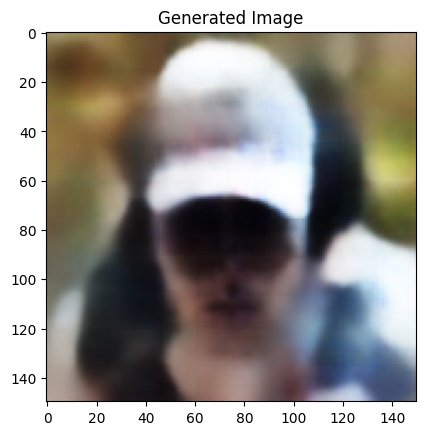

In [17]:
# 编码原始图片
mu, log_var = model.encode(pic)

# 生成新潜在向量
with torch.no_grad():
    std = torch.exp(1e-11 * log_var)  # 调节方差
    eps = torch.randn_like(std)
    z = eps * std + mu
    new_pic = model.decode(z).view(3, IMAGE_SIZE, IMAGE_SIZE)

# 显示生成图片
plt.imshow(new_pic.cpu().permute(1, 2, 0))
plt.title("Generated Image")
plt.show()

In [11]:
save_image(new_pic, "generated_image.jpg")